# PROJET 4 : Réalisez une étude de santé publique avec Python

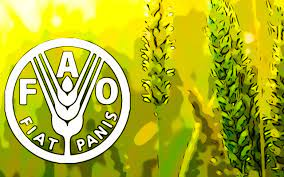



## **Scénario**

*Félicitations ! Vous avez récemment rejoint une équipe de chercheurs de la Food and Agriculture Organization of the United Nations (FAO), en tant que data analyst.*

**Food and Agriculture Organization of the United Nations**

Son rôle ? C’est l’un des organes qui composent l’ONU et dont l’objectif est *« d’aider à construire un monde libéré de la faim ».*

Le responsable de l’équipe, Marc, un chercheur en économie de la santé, est particulièrement enthousiaste à l’idée de votre arrivée au sein de son équipe. En effet, ce recrutement tombe à pic car Julien, l'ancien data analyst, a récemment été muté dans une autre équipe, et la vôtre vient de se voir confier la mission de réaliser une étude de grande ampleur sur le thème de la sous-nutrition dans le monde.

Source des données :

[www.fao.org/faostat/fr/#home](http://www.fao.org/faostat/fr/#home)

Les données sur lesquelles j’aimerais particulièrement avoir des informations sont, pour l’année 2017 :

- la proportion de personnes en état de sous-nutrition ;


- le nombre théorique de personnes qui pourraient être nourries. Tu devrais pouvoir calculer ça à partir de la disponibilité alimentaire mondiale ;


- idem pour la disponibilité alimentaire des produits végétaux ;


- l’utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine. Je crois que Julien avait trouvé un moyen de facilement calculer ces proportions;


- les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017;


- ceux qui ont le plus bénéficié d’aide depuis 2013;


- ceux ayant le plus/le moins de disponibilité/habitant, etc.;


- et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être le plus en difficulté, au niveau alimentaire;



## Sommaire <a class="anchor" id="Sommaire"></a>

*[Préparation du projet](#Import)*

[I. Calculer la proportion de personnes en état de sous-nutrition](#I)

[II. les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017](#II)

[IiI. Le nombre théorique de personnes qui pourraient être nourries](#IiI)

[IV. Le nombre théorique pour la disponibilité alimentaire des produits végétaux](#IV)

[V. utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine.](#V)

[VI. ceux qui ont le plus bénéficié d’aide depuis 2013](#VI)

[VII.ceux ayant le plus/le moins de disponibilité/habitant](#VII)

[VIII. exemple étonnant d’utilisation du manioc par la Thaïlande](#VIII)

[IX.  L'utilisation des céréales](#IX)


### Préparation du projet <a class="anchor" id="Import"></a>

*Import des librairies Python*

In [1]:
#importer librairie
#Calculs et dataframes : 
import numpy as np
import pandas as pd

*Import des données*

In [2]:
#créer pour chaque fichier csv une DataFrame
sous_nutrition_df = pd.read_csv("sous_nutrition.csv")

aide_ali_df = pd.read_csv("aide_alimentaire.csv")

dispo_ali_df = pd.read_csv("dispo_alimentaire.csv")

pop_df = pd.read_csv("population.csv")

FAOSTAT_2017_df = pd.read_csv("FAOSTAT_2017.csv")


FRAME = [sous_nutrition_df , aide_ali_df, dispo_ali_df, pop_df, FAOSTAT_2017_df  ]

In [3]:
FRAME

[             Zone      Année Valeur
 0     Afghanistan  2012-2014    8.6
 1     Afghanistan  2013-2015    8.8
 2     Afghanistan  2014-2016    8.9
 3     Afghanistan  2015-2017    9.7
 4     Afghanistan  2016-2018   10.5
 ...           ...        ...    ...
 1213     Zimbabwe  2013-2015    NaN
 1214     Zimbabwe  2014-2016    NaN
 1215     Zimbabwe  2015-2017    NaN
 1216     Zimbabwe  2016-2018    NaN
 1217     Zimbabwe  2017-2019    NaN
 
 [1218 rows x 3 columns],
      Pays bénéficiaire  Année                   Produit  Valeur
 0          Afghanistan   2013       Autres non-céréales     682
 1          Afghanistan   2014       Autres non-céréales     335
 2          Afghanistan   2013              Blé et Farin   39224
 3          Afghanistan   2014              Blé et Farin   15160
 4          Afghanistan   2013                  Céréales   40504
 ...                ...    ...                       ...     ...
 1470          Zimbabwe   2015  Mélanges et préparations      96
 1471   


**Renommage des colonnes des différents Dataframe**

*(simplification, suppression des colonnes inutiles pour FAOSTAT_2017_df, homogénisation...)*


In [4]:
sous_nutrition_df = sous_nutrition_df.rename(columns = {
    "Année":                                                        "Annee",
    "Valeur":                                                       "Sous_Nutrition"
})


aide_ali_df = aide_ali_df.rename(columns = {
    "Pays bénéficiaire":                                            "Zone",
    "Année":                                                        "Annee",
    "Valeur":                                                       "Aide_Alim"
})

dispo_ali_df = dispo_ali_df.rename(columns = {
    "Aliments pour animaux":                                        "Alim_Animale",
    "Disponibilité alimentaire (Kcal/personne/jour)":               "Dispo_Alim_kcal_pers_j",
    "Disponibilité alimentaire en quantité (kg/personne/an)":       "Dispo_Alim_kg_pers_an",
    "Disponibilité de matière grasse en quantité (g/personne/jour)":"Dispo_Mat_Grasse_g_pers_j",
    "Disponibilité de protéines en quantité (g/personne/jour)":     "Dispo_Prot_g_pers_j",
    "Disponibilité intérieure":                                     "Dispo_Int",
    "Exportations - Quantité":                                      "Exportations",
    "Importations - Quantité":                                      "Importations",
    "Variation de stock":                                           "Variation_Stock"
})

pop_df = pop_df.rename(columns = {
    "Année":                                                        "Annee",
    "Valeur":                                                       "Population"
})





FAOSTAT_2017_df = FAOSTAT_2017_df.drop([
                                "Code Domaine",
                                "Domaine",
                                'Code Produit',
                                'Code année',
                                'Code Élément',
                                'Code zone (FAO)'],
                              axis=1)

FAOSTAT_2017_df = FAOSTAT_2017_df.rename(columns={
    "Année":                                                        "Annee",
    "Unité":                                                        "Unite",
})

In [5]:
print(sous_nutrition_df.isnull().sum() / len(sous_nutrition_df) *100)

Zone               0.000000
Annee              0.000000
Sous_Nutrition    48.768473
dtype: float64


Il manque 48.76 % des valeurs de Sous_Nutrition, il faudra en tenir compte lors des analyses.

In [6]:
# Le nombre de personnes en sous-alimentation en millions d’habitants
# (ex: pour l’intervalle 2016-2018, le nombre de personnes correspond à la moyenne sur ces 3 années, on peut le résumer en 2017)
sous_nutrition_df.head()

,Zone,Annee,Sous_Nutrition
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [7]:
sous_nutrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Zone            1218 non-null   object
 1   Annee           1218 non-null   object
 2   Sous_Nutrition  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [8]:
#remplacement des valeurs <0.1 &NaN  défini comme object par 0 pour transformer object en float

sous_nutrition_df['Sous_Nutrition'] = sous_nutrition_df['Sous_Nutrition'].replace("<0.1", 0)
sous_nutrition_df.fillna(0,inplace=True)

#il nous faut seulement l'année 2017 il nous faut donc prendre l'année 2016-2018

sous_nutrition_df['Annee'] = sous_nutrition_df['Annee'].replace("2016-2018", 2017).replace("2017-2019" , 2018)

#changer astype object en float

sous_nutrition_df['Sous_Nutrition'] = (sous_nutrition_df['Sous_Nutrition'].astype(float, errors = 'raise'))

#sous_nutrition dans le monde par pays 2017

sous_nutrit_2017 = sous_nutrition_df[sous_nutrition_df['Annee'] == 2017]

In [9]:
sous_nutrit_2017

,Zone,Annee,Sous_Nutrition
4,Afghanistan,2017,10.5
10,Afrique du Sud,2017,3.1
16,Albanie,2017,0.1
22,Algérie,2017,1.3
28,Allemagne,2017,0.0
...,...,...,...
1192,Venezuela (République bolivarienne du),2017,8.0
1198,Viet Nam,2017,6.5
1204,Yémen,2017,0.0
1210,Zambie,2017,0.0


In [10]:
# La quantité qui a été donnée comme aide alimentaire, en tonnes
aide_ali_df

,Zone,Annee,Produit,Aide_Alim
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


In [11]:
aide_ali_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Zone       1475 non-null   object
 1   Annee      1475 non-null   int64 
 2   Produit    1475 non-null   object
 3   Aide_Alim  1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [12]:
aide_ali_df.isnull().sum()  / len(aide_ali_df) *100

Zone         0.0
Annee        0.0
Produit      0.0
Aide_Alim    0.0
dtype: float64

In [13]:
#-	10 variables qui précisent les utilisations/moyens d’acquisition de la disponibilité alimentaire. 
#Elles sont toutes exprimées en milliers de tonnes.
dispo_ali_df

,Zone,Produit,Origine,Alim_Animale,Autres Utilisations,Dispo_Alim_kcal_pers_j,Dispo_Alim_kg_pers_an,Dispo_Mat_Grasse_g_pers_j,Dispo_Prot_g_pers_j,Dispo_Int,Exportations,Importations,Nourriture,Pertes,Production,Semences,Traitement,Variation_Stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [14]:
dispo_ali_df['Produit'].unique()

array(['Abats Comestible', 'Agrumes, Autres', 'Aliments pour enfants',
       'Ananas', 'Bananes', 'Beurre, Ghee', 'Bière', 'Blé',
       'Boissons Alcooliques', 'Café', 'Coco (Incl Coprah)', 'Crème',
       'Céréales, Autres', 'Dattes', 'Edulcorants Autres',
       'Feve de Cacao', 'Fruits, Autres', 'Graines de coton',
       'Graines de tournesol', 'Graisses Animales Crue',
       'Huil Plantes Oleif Autr', 'Huile Graines de Coton',
       "Huile d'Arachide", "Huile d'Olive", 'Huile de Colza&Moutarde',
       'Huile de Palme', 'Huile de Soja', 'Huile de Sésame',
       'Huile de Tournesol', 'Lait - Excl Beurre', 'Légumes, Autres',
       'Légumineuses Autres', 'Maïs', 'Miel', 'Millet', 'Miscellanees',
       'Noix', 'Oeufs', 'Olives', 'Oranges, Mandarines', 'Orge',
       'Plantes Oleiferes, Autre', 'Poissons Eau Douce', 'Poivre',
       'Pommes', 'Pommes de Terre', 'Raisin', 'Riz (Eq Blanchi)',
       'Sucre Eq Brut', 'Sucre, betterave', 'Sucre, canne', 'Sésame',
       'Thé', 'Toma

In [15]:
dispo_ali_df.isnull().sum()  / len(dispo_ali_df) *100

Zone                          0.000000
Produit                       0.000000
Origine                       0.000000
Alim_Animale                 82.569689
Autres Utilisations          64.780519
Dispo_Alim_kcal_pers_j        8.740788
Dispo_Alim_kg_pers_an        10.189042
Dispo_Mat_Grasse_g_pers_j    24.421660
Dispo_Prot_g_pers_j          25.914771
Dispo_Int                     1.429029
Exportations                 21.653316
Importations                  4.825376
Nourriture                   10.189042
Pertes                       72.585710
Production                   41.172701
Semences                     86.600449
Traitement                   85.312400
Variation_Stock              56.578020
dtype: float64

In [16]:
#remplacer les NaN par 0

dispo_ali_df.fillna(0,inplace=True)

In [17]:
dispo_ali_df

,Zone,Produit,Origine,Alim_Animale,Autres Utilisations,Dispo_Alim_kcal_pers_j,Dispo_Alim_kg_pers_an,Dispo_Mat_Grasse_g_pers_j,Dispo_Prot_g_pers_j,Dispo_Int,Exportations,Importations,Nourriture,Pertes,Production,Semences,Traitement,Variation_Stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# La population du pays, exprimée en milliers d’habitants.
pop_df

,Zone,Annee,Population
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113
...,...,...,...
1411,Zimbabwe,2014,13586.707
1412,Zimbabwe,2015,13814.629
1413,Zimbabwe,2016,14030.331
1414,Zimbabwe,2017,14236.595


In [19]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Zone        1416 non-null   object 
 1   Annee       1416 non-null   int64  
 2   Population  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [20]:
pop_df.isnull().sum()  / len(pop_df) *100

Zone          0.0
Annee         0.0
Population    0.0
dtype: float64

In [21]:
FAOSTAT_2017_df['Produit'].unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Manioc et produits', 'Pommes de Terre et produits',
       'Patates douces', 'Ignames', 'Racines nda', 'Sucre, canne',
       'Sucre, betterave', 'Sucre non centrifugé', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides', 'Graines de tournesol', 'Graines Colza/Moutarde',
       'Graines de coton', 'Coco (Incl Coprah)', 'Sésame', 'Palmistes',
       'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil P

In [22]:
FAOSTAT_2017_df['Produit'] = FAOSTAT_2017_df['Produit'].replace(['Blé et produits', 'Riz et produits',
       'Orge et produits', 'Maïs et produits', 'Seigle et produits','Millet et produits', 'Sorgho et produits' , 'Pommes de Terre et produits', 'Légumineuses Autres et produits'\
                                                 'Tomates et produits', 'Citrons & Limes et produits' , 'Pamplemousse et produits', 'Pommes et produits', 'Ananas et produits', \
                                                 'Café et produits','Feve de Cacao et produits'], ['Blé', 'Riz',
       'Orge', 'Maïs', 'Seigle','Millet', 'Sorgho' , 'Pommes de Terre', 'Légumineuses Autres'\
                                                 'Tomates', 'Citrons & Limes' , 'Pamplemousse', 'Pommes', 'Ananas', \
                                                 'Café','Feve de Cacao'])

In [23]:
pop_df['Annee'] = (pop_df['Annee'].astype(object, errors = 'raise'))


#population mondiale
pop_mond_2017 = pop_df[pop_df['Annee'] == 2017]
pop_mond_2017_milliers_pays =  pop_df[pop_df['Annee'] == 2017]
pop_mond_2017_milliards = pop_mond_2017['Population'].sum()/1000000

pop_mond_2017_millions = pop_mond_2017['Population'].sum()/1000


#population par pays 2017 exprimé en chiffre entier
pop_mond_2017['Population'] = pop_mond_2017['Population'] * 1000

pop_mond_2017.head(10)

C:\Users\x muscador x\AppData\Local\Temp\ipykernel_11212\42798058.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_mond_2017['Population'] = pop_mond_2017['Population'] * 1000


,Zone,Annee,Population
4,Afghanistan,2017,36296113.0
10,Afrique du Sud,2017,57009756.0
16,Albanie,2017,2884169.0
22,Algérie,2017,41389189.0
28,Allemagne,2017,82658409.0
34,Andorre,2017,77001.0
40,Angola,2017,29816766.0
46,Anguilla,2017,14584.0
52,Antigua-et-Barbuda,2017,95426.0
58,Antilles néerlandaises (ex),2017,275186.0


#### **I. Calculer la proportion de personnes en état de sous-nutrition** <a class="anchor" id="I"></a>




[*calcul avec merge*](#merge),  [*Retour Sommaire*](#Sommaire), [I](#I), [II](#II), [III](#III), [IV](#IV), [V](#V) ,[VI](#VI), [VII](#VII), [VIII](#VIII), [IX](#IX)

In [24]:
# Pour rappel: Le nombre de personnes en sous-alimentation est exprimé en millions d’habitants

## Somme sous_nutrition dans le monde en 2017


nb_sous_nutrit_2017 = sous_nutrit_2017['Sous_Nutrition'].sum()


print(round(pop_mond_2017_milliards, 1) , " milliards pop_mondiale 2017")
print(nb_sous_nutrit_2017, "millions d'habiant souffrant de sous nutrition")
print(round((nb_sous_nutrit_2017), 2), "millions de personnes en sous nutrition, en 2017, soit", round((nb_sous_nutrit_2017 / pop_mond_2017_millions) * 100, 1),"% de la population mondiale")


7.5  milliards pop_mondiale 2017
535.7 millions d'habiant souffrant de sous nutrition
535.7 millions de personnes en sous nutrition, en 2017, soit 7.1 % de la population mondiale


**Calcule avec un merge**<a class="anchor" id="merge"></a>

[*Retour Sommaire*](#Sommaire), [I](#I), [II](#II), [III](#III), [IV](#IV), [V](#V) ,[VI](#VI), [VII](#VII), [VIII](#VIII), [IX](#IX)

In [25]:
#merge des deux df

sous_nutr_pop_2017 = pd.merge(sous_nutrit_2017, pop_mond_2017 , on = 'Zone', how = 'right', indicator = True)

In [26]:
sous_nutr_pop_2017

,Zone,Annee_x,Sous_Nutrition,Annee_y,Population,_merge
0,Afghanistan,2017,10.5,2017,36296113.0,both
1,Afrique du Sud,2017,3.1,2017,57009756.0,both
2,Albanie,2017,0.1,2017,2884169.0,both
3,Algérie,2017,1.3,2017,41389189.0,both
4,Allemagne,2017,0.0,2017,82658409.0,both
...,...,...,...,...,...,...
231,Venezuela (République bolivarienne du),2017,8.0,2017,29402484.0,both
232,Viet Nam,2017,6.5,2017,94600648.0,both
233,Yémen,2017,0.0,2017,27834819.0,both
234,Zambie,2017,0.0,2017,16853599.0,both


In [27]:
# Proportion par pays avec population 'Population' est exprimé en millions

sous_nutr_pop_2017['Population'] = sous_nutr_pop_2017['Population'] / 1000000


In [28]:
sous_nutr_pop_2017

,Zone,Annee_x,Sous_Nutrition,Annee_y,Population,_merge
0,Afghanistan,2017,10.5,2017,36.296113,both
1,Afrique du Sud,2017,3.1,2017,57.009756,both
2,Albanie,2017,0.1,2017,2.884169,both
3,Algérie,2017,1.3,2017,41.389189,both
4,Allemagne,2017,0.0,2017,82.658409,both
...,...,...,...,...,...,...
231,Venezuela (République bolivarienne du),2017,8.0,2017,29.402484,both
232,Viet Nam,2017,6.5,2017,94.600648,both
233,Yémen,2017,0.0,2017,27.834819,both
234,Zambie,2017,0.0,2017,16.853599,both


In [29]:
#Somme Sous nutrition (en millions)

somme_x = sous_nutr_pop_2017['Sous_Nutrition'].sum()

# Somme population mondiale 2017 (en millions)
somme_y = sous_nutr_pop_2017['Population'].sum() 

print(round(somme_y /1000 , 1) , " milliards pop_mondiale 2017")
print(somme_x, "millions d'habitant souffrant de sous nutrition")
print(round((somme_x), 2), "millions de personnes en sous nutrition, en 2017, soit", round((somme_x / somme_y) * 100, 1),"% de la population mondiale")


7.5  milliards pop_mondiale 2017
535.7 millions d'habitant souffrant de sous nutrition
535.7 millions de personnes en sous nutrition, en 2017, soit 7.1 % de la population mondiale


**II. les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017** <a class="anchor" id="II"></a>

[*Retour Sommaire*](#Sommaire), [I](#I), [II](#II), [III](#III), [IV](#IV), [V](#V) ,[VI](#VI), [VII](#VII), [VIII](#VIII), [IX](#IX)

In [30]:
sous_nutr_pop_2017['Proportion par pays'] = ( sous_nutr_pop_2017['Sous_Nutrition'] /sous_nutr_pop_2017['Population']) * 100

In [31]:
sous_nutr_pop_2017[['Zone', 'Annee_x', 'Proportion par pays']]\
.sort_values(by = 'Proportion par pays', ascending=False).head(10).reset_index()

,index,Zone,Annee_x,Proportion par pays
0,87,Haïti,2017,48.259182
1,181,République populaire démocratique de Corée,2017,47.188685
2,128,Madagascar,2017,41.062924
3,122,Libéria,2017,38.279742
4,119,Lesotho,2017,38.249438
5,216,Tchad,2017,37.957606
6,186,Rwanda,2017,35.055619
7,145,Mozambique,2017,32.810898
8,219,Timor-Leste,2017,32.173531
9,0,Afghanistan,2017,28.928718


Selon les données de 2017 de la FAO, nous pouvons constater que plus de 40% de la population d'Haïti , de la Corée du Nord et de Madagascar souffre de sous-nutrition 

**III. Le nombre théorique de personnes qui pourraient être nourries** <a class="anchor" id="III"></a>


*Nous posons  l'hypothèse que le besoin  moyen en calories d'un individu est de 2500 kcal/jour et le besoin en protéines est de 75 g/jour*


[*Retour Sommaire*](#Sommaire), [I](#I), [II](#II), [III](#III), [IV](#IV), [V](#V) ,[VI](#VI), [VII](#VII), [VIII](#VIII), [IX](#IX)

In [32]:
#Pour rappel: 10 variables qui précisent les utilisations/moyens d’acquisition de la disponibilité alimentaire. 
#Elles sont toutes exprimées en milliers de tonnes.
dispo_ali_df.columns.tolist()

['Zone',
 'Produit',
 'Origine',
 'Alim_Animale',
 'Autres Utilisations',
 'Dispo_Alim_kcal_pers_j',
 'Dispo_Alim_kg_pers_an',
 'Dispo_Mat_Grasse_g_pers_j',
 'Dispo_Prot_g_pers_j',
 'Dispo_Int',
 'Exportations',
 'Importations',
 'Nourriture',
 'Pertes',
 'Production',
 'Semences',
 'Traitement',
 'Variation_Stock']

In [33]:
#le nombre théorique de personnes qui pourraient être nourries

besoins_kcal_j = 2500 # besoins journaliers moyen  en kilocalories
besoins_prot_kg_j = 75/1000 # besoins journaliers moyens en kg de protéines

In [34]:
nbre_théo_pers_nour = dispo_ali_df.groupby(by = "Zone" ).sum()\
.reset_index()\
.loc[:]

In [35]:
nbre_théo_pers_nour2 = pd.merge(nbre_théo_pers_nour, pop_mond_2017, on = 'Zone' , how ='right',  indicator = True)

In [36]:
nbre_théo_pers_nour3 = nbre_théo_pers_nour2[['Zone', 'Dispo_Prot_g_pers_j', 'Dispo_Alim_kcal_pers_j', \
                                          'Population']]

nbre_théo_pers_nour3

,Zone,Dispo_Prot_g_pers_j,Dispo_Alim_kcal_pers_j,Population
0,Afghanistan,58.26,2087.0,36296113.0
1,Afrique du Sud,85.33,3020.0,57009756.0
2,Albanie,111.37,3188.0,2884169.0
3,Algérie,91.92,3293.0,41389189.0
4,Allemagne,101.39,3503.0,82658409.0
...,...,...,...,...
231,Venezuela (République bolivarienne du),72.96,2633.0,29402484.0
232,Viet Nam,81.61,2744.0,94600648.0
233,Yémen,58.90,2217.0,27834819.0
234,Zambie,55.22,1924.0,16853599.0


In [37]:
#conversion dispo/pers --> dispo en fonction de la taille de la population divisé par le besoin kcal/prot

nbre_théo_pers_nour3['Dispo_Alim_kcal_j'] = nbre_théo_pers_nour3['Dispo_Alim_kcal_pers_j']\
* nbre_théo_pers_nour3['Population']/ besoins_kcal_j


nbre_théo_pers_nour3['Dispo_Prot_kg_j'] = nbre_théo_pers_nour3['Dispo_Prot_g_pers_j']*.001\
* nbre_théo_pers_nour3['Population']  / besoins_prot_kg_j
 

nbre_théo_pers_nour3

C:\Users\x muscador x\AppData\Local\Temp\ipykernel_11212\3183227350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nbre_théo_pers_nour3['Dispo_Alim_kcal_j'] = nbre_théo_pers_nour3['Dispo_Alim_kcal_pers_j']\
C:\Users\x muscador x\AppData\Local\Temp\ipykernel_11212\3183227350.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nbre_théo_pers_nour3['Dispo_Prot_kg_j'] = nbre_théo_pers_nour3['Dispo_Prot_g_pers_j']*.001\


,Zone,Dispo_Prot_g_pers_j,Dispo_Alim_kcal_pers_j,Population,Dispo_Alim_kcal_j,Dispo_Prot_kg_j
0,Afghanistan,58.26,2087.0,36296113.0,3.030000e+07,2.819482e+07
1,Afrique du Sud,85.33,3020.0,57009756.0,6.886779e+07,6.486190e+07
2,Albanie,111.37,3188.0,2884169.0,3.677892e+06,4.282799e+06
3,Algérie,91.92,3293.0,41389189.0,5.451784e+07,5.072659e+07
4,Allemagne,101.39,3503.0,82658409.0,1.158210e+08,1.117431e+08
...,...,...,...,...,...,...
231,Venezuela (République bolivarienne du),72.96,2633.0,29402484.0,3.096670e+07,2.860274e+07
232,Viet Nam,81.61,2744.0,94600648.0,1.038337e+08,1.029381e+08
233,Yémen,58.90,2217.0,27834819.0,2.468392e+07,2.185961e+07
234,Zambie,55.22,1924.0,16853599.0,1.297053e+07,1.240874e+07


In [38]:


nbre_théo_pers_nour_sum_kcal = nbre_théo_pers_nour3['Dispo_Alim_kcal_j'].sum()



nbre_théo_pers_nour_sum_prot = nbre_théo_pers_nour3['Dispo_Prot_kg_j'].sum()


print(nbre_théo_pers_nour_sum_prot, "nombre théorique de personnes pouvant être nourrie au regard de la dispobinilité en protéine")
print(nbre_théo_pers_nour_sum_kcal, "nombre théorique de personnes pouvant être nourrie au regard de la dispobinilité en kcal")

7827515648.793067 nombre théorique de personnes pouvant être nourrie au regard de la dispobinilité en protéine
8367593850.932401 nombre théorique de personnes pouvant être nourrie au regard de la dispobinilité en kcal


In [39]:
print("soit", round(nbre_théo_pers_nour_sum_kcal / nbre_théo_pers_nour3['Population'].sum()  *100, 2),\
      "% de personnes pouvant être nourrie au regard de la dispobinilité kcal")



soit 110.86 % de personnes pouvant être nourrie au regard de la dispobinilité kcal


In [40]:
print("soit", round(nbre_théo_pers_nour_sum_prot / nbre_théo_pers_nour3['Population'].sum()  *100, 2),\
      "% de personnes pouvant être nourrie au regard de la dispobinilité kcal")



soit 103.7 % de personnes pouvant être nourrie au regard de la dispobinilité kcal


**IV. Le nombre théorique pour la disponibilité alimentaire des produits végétaux** <a class="anchor" id="IV"></a>


[*Retour Sommaire*](#Sommaire), [I](#I), [II](#II), [III](#III), [IV](#IV), [V](#V) ,[VI](#VI), [VII](#VII), [VIII](#VIII), [IX](#IX)

In [41]:
#disponibilité alimentaire production végétale

dispo_ali_prod_veg = dispo_ali_df[dispo_ali_df['Origine'] == 'vegetale' ]

dispo_ali_prod_veg = dispo_ali_prod_veg.groupby(by = "Zone" ).sum()

dispo_ali_prod_veg = pd.merge(dispo_ali_prod_veg, pop_mond_2017, on = 'Zone' , how ='right', indicator = True)

dispo_ali_prod_veg = dispo_ali_prod_veg[['Zone', 'Dispo_Prot_g_pers_j', 'Dispo_Alim_kcal_pers_j', \
                                          'Population']]

dispo_ali_prod_veg

,Zone,Dispo_Prot_g_pers_j,Dispo_Alim_kcal_pers_j,Population
0,Afghanistan,46.05,1871.0,36296113.0
1,Afrique du Sud,48.94,2533.0,57009756.0
2,Albanie,51.96,2203.0,2884169.0
3,Algérie,66.94,2915.0,41389189.0
4,Allemagne,39.90,2461.0,82658409.0
...,...,...,...,...
231,Venezuela (République bolivarienne du),34.83,2157.0,29402484.0
232,Viet Nam,50.56,2169.0,94600648.0
233,Yémen,45.05,2028.0,27834819.0
234,Zambie,45.99,1818.0,16853599.0


In [42]:
#conversion dispo/pers --> dispo en fonction de la taille de la population divisé par le besoin kcal/prot

dispo_ali_prod_veg['Dispo_Alim_kcal_j'] = dispo_ali_prod_veg['Dispo_Alim_kcal_pers_j']\
* dispo_ali_prod_veg['Population'] / besoins_kcal_j

#+conversion g -> kg
dispo_ali_prod_veg['Dispo_Prot_kg_j'] = dispo_ali_prod_veg['Dispo_Prot_g_pers_j']*.001\
*dispo_ali_prod_veg['Population']  / besoins_prot_kg_j 

dispo_ali_prod_veg

,Zone,Dispo_Prot_g_pers_j,Dispo_Alim_kcal_pers_j,Population,Dispo_Alim_kcal_j,Dispo_Prot_kg_j
0,Afghanistan,46.05,1871.0,36296113.0,2.716401e+07,2.228581e+07
1,Afrique du Sud,48.94,2533.0,57009756.0,5.776228e+07,3.720077e+07
2,Albanie,51.96,2203.0,2884169.0,2.541530e+06,1.998152e+06
3,Algérie,66.94,2915.0,41389189.0,4.825979e+07,3.694123e+07
4,Allemagne,39.90,2461.0,82658409.0,8.136894e+07,4.397427e+07
...,...,...,...,...,...,...
231,Venezuela (République bolivarienne du),34.83,2157.0,29402484.0,2.536846e+07,1.365451e+07
232,Viet Nam,50.56,2169.0,94600648.0,8.207552e+07,6.377345e+07
233,Yémen,45.05,2028.0,27834819.0,2.257961e+07,1.671945e+07
234,Zambie,45.99,1818.0,16853599.0,1.225594e+07,1.033463e+07


In [43]:


nbre_théo_pers_nour_prod_veg_sum_kcal = dispo_ali_prod_veg['Dispo_Alim_kcal_j'].sum()


nbre_théo_pers_nour_prod_veg_sum_prot = dispo_ali_prod_veg['Dispo_Prot_kg_j'].sum()


print(nbre_théo_pers_nour_prod_veg_sum_prot, "nombre théorique de personnes pouvant être nourrie au regard de la dispobinilité en protéine pour les produits d'origine végétale")
print(nbre_théo_pers_nour_prod_veg_sum_kcal, "nombre théorique de personnes pouvant être nourrie au regard de la dispobinilité en kcal pour les produits d'origine végétale")


4774000757.052134 nombre théorique de personnes pouvant être nourrie au regard de la dispobinilité en protéine pour les produits d'origine végétale
6904305684.600399 nombre théorique de personnes pouvant être nourrie au regard de la dispobinilité en kcal pour les produits d'origine végétale


In [44]:
print("soit", round((nbre_théo_pers_nour_prod_veg_sum_kcal / dispo_ali_prod_veg['Population'].sum() ) *100, 2),\
      "% de personnes pouvant être nourrie au regard de la dispobinilité kcal en produit végétal")





soit 91.47 % de personnes pouvant être nourrie au regard de la dispobinilité kcal en produit végétal


In [45]:
print("soit", round((nbre_théo_pers_nour_prod_veg_sum_prot / dispo_ali_prod_veg['Population'].sum() ) *100, 2),\
      "% de personnes pouvant être nourrie au regard de la dispobinilité protéine en produit végétal")


soit 63.25 % de personnes pouvant être nourrie au regard de la dispobinilité protéine en produit végétal


**V. utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine.** <a class="anchor" id="V"></a>


[*Retour Sommaire*](#Sommaire), [I](#I), [II](#II), [III](#III), [IV](#IV), [V](#V) ,[VI](#VI), [VII](#VII), [VIII](#VIII), [IX](#IX)

In [46]:
#l’utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, 
#celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine.


dispo_int = dispo_ali_df['Dispo_Int'].sum()

dispo_ali_animale = dispo_ali_df['Alim_Animale'].sum()

dispo_int_perdue = dispo_ali_df['Pertes'].sum()

dispo_ali_hum = dispo_ali_df['Nourriture'].sum()



print(dispo_int, "milliers de tonnes de la somme totale de la disponibilité intériéure")
print(dispo_ali_animale, "milliers de tonnes de la somme totale de la disponibilité alimentation animale")
print(dispo_int_perdue, "milliers de tonnes de la somme totale des pertes")
print(dispo_ali_hum, "milliers de tonnes de la somme totale de l'alimentation humaine")

print(round((dispo_ali_animale / dispo_int) * 100, 1) , "% de la part qui est attribuée à l’alimentation animale ")
print(round((dispo_int_perdue / dispo_int) * 100, 1) , "% de part perdue")
print(round((dispo_ali_hum / dispo_int) * 100, 1), "% qui est concrètement utilisée pour l'alimentation humaine")

9848994.0 milliers de tonnes de la somme totale de la disponibilité intériéure
1304245.0 milliers de tonnes de la somme totale de la disponibilité alimentation animale
453698.0 milliers de tonnes de la somme totale des pertes
4876258.0 milliers de tonnes de la somme totale de l'alimentation humaine
13.2 % de la part qui est attribuée à l’alimentation animale 
4.6 % de part perdue
49.5 % qui est concrètement utilisée pour l'alimentation humaine


In [71]:
#Disponibilité intérieure = Nourriture+ Traitement + Alimentation animale + Autres utilisations + Pertes + Semences
a = dispo_ali_df[['Nourriture','Traitement', 'Alim_Animale', 'Autres Utilisations','Pertes', 'Semences']].sum()
a.sum()

9858592.0

In [87]:
#Disponibilité intérieure = Production + Importation - Exportation + Variation des stocks

b = dispo_ali_df[['Production','Importations','Exportations','Variation_Stock']].sum()

b

Production         10009680.0
Importations        1296053.0
Exportations        1352158.0
Variation_Stock     -104402.0
dtype: float64

In [89]:
b = b[['Production','Importations']].sum() - b[['Exportations', 'Variation_Stock']].sum()
b

10057977.0

Disponibilité intérieure = Nourriture+ Traitement + Alimentation animale + Autres utilisations + Pertes + Semences
& Disponibilité intérieure = Production + Importation - Exportation + Variation des stocks
En effet, ces paramètres additionnés dépassent la somme de la disponibilité intérieure. On ne peut pas expliquer le lien logique entre l’ensemble des 10 variables exprimées en milliers de tonnes sur les utilisations de la disponibilité intérieure

**VI. ceux qui ont le plus bénéficié d’aide depuis 2013** 
<a class="anchor" id="VI"></a>

[*Retour Sommaire*](#Sommaire), [I](#I), [II](#II), [III](#III), [IV](#IV), [V](#V) ,[VI](#VI), [VII](#VII), [VIII](#VIII), [IX](#IX)

In [47]:
# ceux qui ont le plus bénéficié d’aide depuis 2013


aide_ali_par_pays = aide_ali_df[aide_ali_df['Annee'] >= 2013]

aide_ali_par_pays


,Zone,Annee,Produit,Aide_Alim
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


In [48]:
#tri des pays qui ont bénéficié le plus de l'aide alimentaire depuis 2013

aide_ali_par_pays ['aide bénéficié depuis 2013 (en tonnes)'] = aide_ali_par_pays['Aide_Alim']
del aide_ali_par_pays['Aide_Alim']
del aide_ali_par_pays['Annee']
aide_ali_par_pays.groupby(by = "Zone" ).sum('aide bénéficié depuis 2013 (en tonnes)')\
.reset_index()\
.sort_values(by="aide bénéficié depuis 2013 (en tonnes)", ascending=False)\
.iloc[:10]

,Zone,aide bénéficié depuis 2013 (en tonnes)
50,République arabe syrienne,1858943
75,Éthiopie,1381294
70,Yémen,1206484
61,Soudan du Sud,695248
60,Soudan,669784
30,Kenya,552836
3,Bangladesh,348188
59,Somalie,292678
53,République démocratique du Congo,288502
43,Niger,276344


On retrouve la Syrie en première position, en raison de la guerre civile qui a éclaté en 2014 ce qui pourrait expliquer le chiffre élevé d'aide bénéficié depuis 2013.

De même que pour l'Ethiopie particulière au niveau de la région du Tigré et pour le Yemen qui ont connu un conflit armé jusqu'en 2017 entre  chiites houthis et les forces fidèles à l'ex-président Ali Abdallah Saleh

**VII.ceux ayant le plus/le moins de disponibilité/habitant**

<a class="anchor" id="VII"></a>

[*Retour Sommaire*](#Sommaire), [I](#I), [II](#II), [III](#III), [IV](#IV), [V](#V) ,[VI](#VI), [VII](#VII), [VIII](#VIII), [IX](#IX)

In [49]:
dispo_ali_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Zone                       15605 non-null  object 
 1   Produit                    15605 non-null  object 
 2   Origine                    15605 non-null  object 
 3   Alim_Animale               15605 non-null  float64
 4   Autres Utilisations        15605 non-null  float64
 5   Dispo_Alim_kcal_pers_j     15605 non-null  float64
 6   Dispo_Alim_kg_pers_an      15605 non-null  float64
 7   Dispo_Mat_Grasse_g_pers_j  15605 non-null  float64
 8   Dispo_Prot_g_pers_j        15605 non-null  float64
 9   Dispo_Int                  15605 non-null  float64
 10  Exportations               15605 non-null  float64
 11  Importations               15605 non-null  float64
 12  Nourriture                 15605 non-null  float64
 13  Pertes                     15605 non-null  flo

In [50]:
#ceux ayant le plus/le moins de disponibilité/habitant
    
# Somme des disponibilités alimentaires par pays:
Dispo_Nourriture_Zone = dispo_ali_df.groupby(["Zone"])[["Dispo_Alim_kcal_pers_j"]].sum() 

# Création d'un DataFrame contenant toutes les données pour le calcul:
pop_dispo_alim = pd.merge(pop_mond_2017_milliers_pays, Dispo_Nourriture_Zone,on=["Zone"])


In [51]:
pop_dispo_alim.sort_values(by="Dispo_Alim_kcal_pers_j", ascending=False)\
.iloc[:10]

,Zone,Annee,Population,Dispo_Alim_kcal_pers_j
11,Autriche,2017,8819.901,3770.0
17,Belgique,2017,11419.748,3737.0
163,Turquie,2017,81116.450,3708.0
54,États-Unis d'Amérique,2017,325084.756,3682.0
80,Israël,2017,8243.848,3610.0
78,Irlande,2017,4753.279,3602.0
81,Italie,2017,60673.701,3578.0
95,Luxembourg,2017,591.910,3540.0
47,Égypte,2017,96442.591,3518.0
4,Allemagne,2017,82658.409,3503.0


In [52]:
pop_dispo_alim.sort_values(by="Dispo_Alim_kcal_pers_j", ascending=True)\
.iloc[:10]

,Zone,Annee,Population,Dispo_Alim_kcal_pers_j
131,République centrafricaine,2017,4596.023,1879.0
170,Zambie,2017,16853.599,1924.0
97,Madagascar,2017,25570.512,2056.0
0,Afghanistan,2017,36296.113,2087.0
70,Haïti,2017,10982.366,2089.0
136,République populaire démocratique de Corée,2017,25429.825,2093.0
156,Tchad,2017,15016.753,2109.0
171,Zimbabwe,2017,14236.595,2113.0
120,Ouganda,2017,41166.588,2126.0
55,Éthiopie,2017,106399.924,2129.0


**VIII. exemple étonnant d’utilisation du manioc par la Thaïlande** <a class="anchor" id="VIII"></a>

[*Retour Sommaire*](#Sommaire), [I](#I), [II](#II), [III](#III), [IV](#IV), [V](#V) ,[VI](#VI), [VII](#VII), [VIII](#VIII), [IX](#IX)

In [53]:
# Utilisation globale du Manioc:en Milliers de tonnes --> conversion en  Tonnes 
use_manioc = dispo_ali_df.loc[(dispo_ali_df["Produit"]=="Manioc") ,("Nourriture","Alim_Animale")].sum() *0.001

print(use_manioc)

Nourriture      100.637
Alim_Animale     87.056
dtype: float64


In [54]:
#exemple étonnant d’utilisation du manioc par la Thaïlande aux égards de la proportion de personnes en sous-nutrition.
#Il serait intéressant d’aller à nouveau y jeter un coup d’œil, de mémoire ça concernait l’exportation par rapport 
#à la production.

#Création d'une dataframe thai_manioc à partir des bilans alimentaires
#avec pour restriction suivant le Pays Thaïlande et le produit Manioc

thai_manioc = dispo_ali_df
thai_manioc = thai_manioc[(thai_manioc['Zone'] == 'Thaïlande') & (thai_manioc['Produit'] == 'Manioc')]

 #Utilisation globale du Manioc:
#use_manioc = dispo_ali_df.loc[(dispo_ali_df["Produit"]=="Manioc"),("Nourriture","Alim_Animale")].sum()

In [55]:
#Les valeurs "Exportations - Quantité" sont exprimées en Milliers de tonnes --> conversion en  Tonnes

Export_Quant_Manioc = thai_manioc['Exportations'] *0.001
Pour_Export_Manioc = (thai_manioc["Exportations"]/ thai_manioc["Production"] )* 100


print(round(Export_Quant_Manioc.sum(), 2), "Tonnes de manioc sont exporté en dehors de la thailande")

print(round(Pour_Export_Manioc.sum(),2), "% du Manioc produit est exporté")
print(round((1 - (thai_manioc["Exportations"]/ thai_manioc["Production"]).sum()) * 100 , 2), "% du Manioc est gardé soit" , \
      round(((thai_manioc['Production'] * 0.001).sum() - (thai_manioc['Exportations'] *0.001).sum()), 2), "Tonnes de manioc")

25.21 Tonnes de manioc sont exporté en dehors de la thailande
83.41 % du Manioc produit est exporté
16.59 % du Manioc est gardé soit 5.01 Tonnes de manioc


In [56]:
#Les valeurs "Production" sont exprimées en Milliers de tonnes --> conversion en  Tonnes

Prod_Quant_Manioc = thai_manioc['Production'] * 0.001

print(Prod_Quant_Manioc.sum(), "Tonnes de manioc sont produit en thailande")

30.228 Tonnes de manioc sont produit en thailande


In [66]:
#Manioc disponible en thailande 

dispo_manioc_thai = Prod_Quant_Manioc - Export_Quant_Manioc
print(dispo_manioc_thai, "Tonnes de manioc")

13809    5.014
dtype: float64 Tonnes de manioc


In [58]:
#le Manioc de Thaïlande par rapport aux regards de la proportion de personnes en sous-nutrition

sous_nutri_thai_2017 = sous_nutr_pop_2017[sous_nutr_pop_2017['Zone'] == 'Thaïlande']
# * Pour rappel Le nombre de personnes en sous-alimentation en millions d’habitants Valeur_x
# * Pour rappel La population du pays, exprimée en milliers d’habitants Valeur_y

del sous_nutri_thai_2017['Annee_y']
del sous_nutri_thai_2017['_merge']

sous_nutri_thai_2017

,Zone,Annee_x,Sous_Nutrition,Population,Proportion par pays
218,Thaïlande,2017,6.2,69.20981,8.958268


**IX. L'utilisation des céréales** <a class="anchor" id="IX"></a>

[*Retour Sommaire*](#Sommaire), [I](#I), [II](#II), [III](#III), [IV](#IV), [V](#V) ,[VI](#VI), [VII](#VII), [VIII](#VIII), [IX](#IX)

Julien a découvert des chiffres intéressants sur l’utilisation des céréales, notamment sur la répartition entre l’alimentation humaine (colonne Nourriture) et l’alimentation pour animaux.

In [59]:
#récupération de la liste de céréale présent dans le fichier télécharger 

liste_cereales = FAOSTAT_2017_df['Produit']

In [60]:
#Correspondance de la liste de céréale présent dans le fichier télécharger avec liste produit de la df dispo_ali_df
dispo_cereales = dispo_ali_df[dispo_ali_df["Produit"].isin(liste_cereales)]


In [61]:
dispo_cereales

,Zone,Produit,Origine,Alim_Animale,Autres Utilisations,Dispo_Alim_kcal_pers_j,Dispo_Alim_kg_pers_an,Dispo_Mat_Grasse_g_pers_j,Dispo_Prot_g_pers_j,Dispo_Int,Exportations,Importations,Nourriture,Pertes,Production,Semences,Traitement,Variation_Stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15599,Îles Salomon,Viande de Bovins,animale,0.0,0.0,27.0,5.57,1.80,2.62,3.0,0.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
proportion_cereales_tot = dispo_cereales[['Dispo_Int' , "Alim_Animale","Nourriture"]].sum()

proportion_alim_animale = dispo_cereales.Alim_Animale.sum() / dispo_cereales.Dispo_Int.sum()

proportion_alim_hum =  dispo_cereales.Nourriture.sum() / dispo_cereales.Dispo_Int.sum()


In [63]:
proportion_cereales_tot

Dispo_Int       7671396.0
Alim_Animale    1125164.0
Nourriture      3138732.0
dtype: float64

In [64]:
print("proportion alimentation animale", round(proportion_alim_animale , 2 ))
print("soit", round(proportion_alim_animale*100 , 2) , "%" )

proportion alimentation animale 0.15
soit 14.67 %


In [65]:
print("proportion alimentation humaine", round(proportion_alim_hum, 2 ))
print("soit", round(proportion_alim_hum * 100, 2), "%" )

proportion alimentation humaine 0.41
soit 40.91 %
